In [149]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from numpy import random
from numpy.random import randn
from filterpy.kalman import KalmanFilter
from filterpy.common import Q_discrete_white_noise
import kf_book.book_plots as bp
from scipy.linalg import block_diag
# read from csv and save corresponding column data to variables
# df = pd.read_csv('point1.csv')
# # transfer unit to meter
# y = df.y.div(1000)
# x = df.x.div(1000)
# # l = len(y)
# x_mean = np.mean(x)
# y_mean = np.mean(y)
process_std = 0.028
process_var = 0.028 ** 2
process_var_lateral = 0.019 **2
sensor_std = 0.077
sensor_var = 0.077 ** 2
sensor_var_lateral = 0.125 ** 2

In [150]:
# x_mean

In [151]:
# y_mean

In [152]:
# N = 4
# points = []
# hxs = []
# hys = []
# for i in range(1, N + 1):
#     df = pd.read_csv(f'hall_p{i}.csv')
#     # transfer unit to meter
#     y = df.y.div(1000)
#     x = df.x.div(1000)
#     # l = len(y)
#     x_mean = np.mean(x)
#     hxs.append(x_mean)
#     y_mean = np.mean(y)
#     hys.append(y_mean)
#     points.append([x_mean, y_mean])

# print(f"hxs: {hxs}\thys: {hys}")

In [153]:
hxs = [8.723759999999999, 3.6838487394957995, 4.049650684931506, 8.538613138686127]
hys = [11.424, 12.025176470588242, 1.373095890410959, 1.2489416058394163]

In [154]:
new_hxs = []
for hx in hxs:
    new_hxs.append(18.57 - hx)

In [155]:
from math import sqrt
dist = 0
dists = []
for i in range(len(new_hxs) - 1):
    dists.append(sqrt((new_hxs[i+1] - new_hxs[i])**2 + (hys[i+1] - hys[i])**2))
    dist += sqrt((new_hxs[i+1] - new_hxs[i])**2 + (hys[i+1] - hys[i])**2)
dist    

20.224678476610272

In [205]:
single_dist = dist/50

In [206]:
single_dist

0.40449356953220544

In [157]:
dists

[5.075639729388402, 10.658359711976068, 4.490679035245803]

In [158]:
cnt = []
for i, d in enumerate(dists):
    print(f"{round(d/single_dist)} samples on {i+1} line segment")
    cnt.append(round(d/single_dist))

13 samples on 1 line segment
26 samples on 2 line segment
11 samples on 3 line segment


In [159]:
l = len(new_hxs)
l

4

In [160]:
new_hxs

[9.846240000000002, 14.886151260504201, 14.520349315068493, 10.031386861313873]

In [161]:
# sample for new_hxs and hys
foyerX = []
# for the first line segment
i = 0
foyerX += np.arange(new_hxs[i], new_hxs[i+1], (new_hxs[i+1] - new_hxs[i])/cnt[i]).tolist()
                  
foyer_samp_len = len(foyerX)
# samp_theoX = np.arange(theo_x[0], theo_x[-1], (theo_x[-1] - theo_x[0])/50).tolist()
foyer_samp_len

13

In [162]:
foyerX

[9.846240000000002,
 10.233925481577248,
 10.621610963154495,
 11.009296444731742,
 11.396981926308989,
 11.784667407886236,
 12.172352889463482,
 12.56003837104073,
 12.947723852617976,
 13.335409334195223,
 13.72309481577247,
 14.110780297349717,
 14.498465778926963]

In [163]:
xs = [5.799013605442178, 5.677136752136748, 5.70306106870229, 5.09885606060606, 5.120082644628101, 4.572519379844961, 4.478495575221241, 2.03554054054054]
ys = [4.865020408163268, 4.234247863247866, 3.7864122137404563, 3.554515151515152, 3.1047024793388442, 2.931767441860464, 2.4959646017699106, 2.353558558558559]

In [164]:
from math import sin, cos, radians
# calculation of theoretical x and y for track assuming the first coordinate is correct
theo_x = [xs[0]]
theo_y = [ys[0]]

# 2nd point
theo_x.append(theo_x[-1])
theo_y.append(theo_y[-1] - 0.7)

# 3rd point
rad = radians(30)
theo_x.append(theo_x[-1] - 0.5 * sin(rad))
theo_y.append(theo_y[-1] - 0.5 * cos(rad))

# 4th point
rad = radians(30)
theo_x.append(theo_x[-1] - 0.5 * cos(rad))
theo_y.append(theo_y[-1] - 0.5 * sin(rad))

# 5th point
theo_x.append(theo_x[-1])
theo_y.append(theo_y[-1] - 0.5)

# 6th point
theo_x.append(theo_x[-1] - 0.5)
theo_y.append(theo_y[-1])

# 7th point
theo_x.append(theo_x[-1])
theo_y.append(theo_y[-1] - 0.6)

# 8th point
theo_x.append(theo_x[-1] - 2.5)
theo_y.append(theo_y[-1])

In [165]:
theo_x, theo_y

([5.799013605442178,
  5.799013605442178,
  5.549013605442178,
  5.116000903549958,
  5.116000903549958,
  4.616000903549958,
  4.616000903549958,
  2.116000903549958],
 [4.865020408163268,
  4.165020408163268,
  3.7320077062710486,
  3.4820077062710486,
  2.9820077062710486,
  2.9820077062710486,
  2.3820077062710485,
  2.3820077062710485])

In [166]:
# sample for xs and ys
sampleX = np.arange(xs[0], xs[-1], (xs[-1] - xs[0])/50).tolist()
samp_len = len(sampleX)
# samp_theoX = np.arange(theo_x[0], theo_x[-1], (theo_x[-1] - theo_x[0])/50).tolist()
samp_len

51

In [167]:
xs

[5.799013605442178,
 5.677136752136748,
 5.70306106870229,
 5.09885606060606,
 5.120082644628101,
 4.572519379844961,
 4.478495575221241,
 2.03554054054054]

In [168]:
l = len(xs)
sampleY = []
j = 0
for i in range(l - 1):    
    k = (ys[i+1] - ys[i])/(xs[i+1] - xs[i])
    while j < samp_len and xs[i+1] <= sampleX[j] <= xs[i]:
        sampleY.append(k * (sampleX[j] - xs[i]) + ys[i])
        j += 1
#     print(f"k for measured track = {k}, the function is:\ny = {k}*(X - {xs[i]}) + {ys[i]}")

In [169]:
new_hxs

[9.846240000000002, 14.886151260504201, 14.520349315068493, 10.031386861313873]

In [170]:
cnt

[13, 26, 11]

In [171]:
foyerX

[9.846240000000002,
 10.233925481577248,
 10.621610963154495,
 11.009296444731742,
 11.396981926308989,
 11.784667407886236,
 12.172352889463482,
 12.56003837104073,
 12.947723852617976,
 13.335409334195223,
 13.72309481577247,
 14.110780297349717,
 14.498465778926963]

In [172]:
from scipy.interpolate import interp1d
l = len(new_hxs)
foyerY = []
j = m = 0
for i in range(l - 1):          
    k = (hys[i+1] - hys[i])/(new_hxs[i+1] - new_hxs[i])
    print(f"k = {k}, m = {m}")
    while j < cnt[m] and new_hxs[m] <= foyerX[j] <= new_hxs[m+1]:
        foyerY.append(k * (foyerX[j] - new_hxs[i]) + hys[i])
        j += 1
    m += 1
#     j = 0
#     while j < cnt[m] and new_hxs[i+1] <= foyerX[j] <= new_hxs[i]:
#         foyerY.append(k * (foyerX[j] - new_hxs[i]) + hys[i])
#         j += 1        
#     print(f"k for measured track = {k}, the function is:\ny = {k}*(X - {xs[i]}) + {ys[i]}")

k = 0.11928314597509407, m = 0
k = 29.11980297832905, m = 1


IndexError: list index out of range

In [ ]:
# foyerY = [11.424,
#  11.470244343891403,
#  11.516488687782806,
#  11.56273303167421,
#  11.608977375565614,
#  11.655221719457016,
#  11.70146606334842,
#  11.747710407239824,
#  11.793954751131226,
#  11.84019909502263,
#  11.886443438914034,
#  11.932687782805436,
#  11.97893212669684]

In [ ]:
i = 1
if len(foyerY) < cnt[0] + cnt[1]:
    foyerY += np.arange(hys[i], hys[i+1], (hys[i+1] - hys[i])/cnt[i]).tolist()

In [ ]:
foyerY

In [ ]:
k = (hys[1] - hys[2])/(new_hxs[1] - new_hxs[2])
k    

In [ ]:
for i in range(cnt[0], cnt[0] + cnt[1]):
#     print(f"i = {i}")
    if len(foyerX) < len(foyerY):
        foyerX.append((foyerY[i] - hys[1])/k + new_hxs[1])

In [179]:
foyerX = [9.846240000000002,
 10.233925481577248,
 10.621610963154495,
 11.009296444731742,
 11.396981926308989,
 11.784667407886236,
 12.172352889463482,
 12.56003837104073,
 12.947723852617976,
 13.335409334195223,
 13.72309481577247,
 14.110780297349717,
 14.498465778926963,
 14.886151260504201,
 14.87208195491052,
 14.858012649316839,
 14.843943343723158,
 14.829874038129477,
 14.815804732535796,
 14.801735426942114,
 14.787666121348433,
 14.773596815754752,
 14.759527510161071,
 14.74545820456739,
 14.731388898973709,
 14.71731959338003,
 14.703250287786348,
 14.689180982192667,
 14.675111676598986,
 14.661042371005305,
 14.646973065411624,
 14.632903759817943,
 14.618834454224261,
 14.60476514863058,
 14.5906958430369,
 14.576626537443218,
 14.562557231849537,
 14.548487926255856,
 14.534418620662175,
 14.520349315068493,
 14.11226181927262,
 13.704174323476746,
 13.296086827680872,
 12.887999331884998,
 12.479911836089125,
 12.07182434029325,
 11.663736844497377,
 11.255649348701503,
 10.84756185290563,
 10.439474357109756]

In [ ]:
i = 2
if len(foyerX) < 50:
    foyerX += np.arange(new_hxs[i], new_hxs[i+1], (new_hxs[i+1] - new_hxs[i])/cnt[i]).tolist()

In [ ]:
hys

In [ ]:
k = (hys[2] - hys[3])/(new_hxs[2] - new_hxs[3])
k    

In [ ]:
for i in range(cnt[0] + cnt[1], 50):
#     print(f"i = {i}")
    if len(foyerX) > len(foyerY):
        foyerY.append((foyerX[i] - new_hxs[3])*k + hys[3])

In [180]:
foyerY = [11.424,
 11.470244343891403,
 11.516488687782806,
 11.56273303167421,
 11.608977375565614,
 11.655221719457016,
 11.70146606334842,
 11.747710407239824,
 11.793954751131226,
 11.84019909502263,
 11.886443438914034,
 11.932687782805436,
 11.97893212669684,
 12.025176470588242,
 11.615481063658347,
 11.205785656728452,
 10.796090249798556,
 10.386394842868661,
 9.976699435938766,
 9.56700402900887,
 9.157308622078975,
 8.74761321514908,
 8.337917808219185,
 7.92822240128929,
 7.518526994359394,
 7.108831587429499,
 6.699136180499604,
 6.289440773569709,
 5.879745366639813,
 5.470049959709918,
 5.060354552780023,
 4.650659145850128,
 4.240963738920232,
 3.831268331990337,
 3.421572925060442,
 3.0118775181305466,
 2.6021821112006513,
 2.192486704270756,
 1.7827912973408608,
 1.373095890410959,
 1.3618091372680914,
 1.3505223841252239,
 1.3392356309823565,
 1.327948877839489,
 1.3166621246966215,
 1.305375371553754,
 1.2940886184108864,
 1.282801865268019,
 1.2715151121251516,
 1.260228358982284]

In [ ]:
# corridor anchor coordinates
cx = [0, 28.547, 28.547, 15, 16.794]
cy = [0, -0.025, 2.293, 0, 2.293]
plt.rcParams.update({'font.size': 14})
plt.scatter(cx, cy, color='b', label='Anchors in corridor' )
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(-1, 30)
plt.ylim(-5, 5)
plt.xlabel("X-coordinate (m)")
plt.ylabel("Y-coordinate (m)")
plt.legend(loc='lower left')
# plt.savefig('anchors_corridor.pdf', bbox_inches='tight', dpi=400)

In [ ]:
# foyer anchor coordinates
hx = [0, 0, 18.573, 18.573]
hy = [0, 13.657, 13.657, 0]
plt.rcParams.update({'font.size': 14})
plt.scatter(hx, hy, color='b', label='Anchors in hall' )
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(-1, 20)
plt.ylim(-1, 15)
plt.xlabel("X-coordinate (m)")
plt.ylabel("Y-coordinate (m)")
plt.legend(loc='best')
# plt.savefig('anchors_corridor.pdf', bbox_inches='tight', dpi=400)

In [ ]:
samp_lenY = len(sampleY)

In [ ]:
samp_lenY

In [ ]:
plt.figure(figsize=(16, 12), dpi=80)
plt.rcParams.update({'font.size': 24})
plt.xlabel("X-coordinate (m)")
plt.ylabel("Y-coordinate (m)")
plt.plot(new_hxs, hys, '-o', color='m', label='Measured Track')
# plt.plot(theo_x, theo_y, '-o', color='g', label='Calculated Track')
plt.scatter(foyerX, foyerY, color='b', label='Samples' )
plt.gca().set_aspect('equal', adjustable='box')
plt.annotate("Start", xy=(new_hxs[0], hys[0]), xytext=(new_hxs[0] + 100, hys[0] - 100), textcoords='offset points', ha='center', va='bottom',color='black',
         bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.3),
         arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5', 
                            color='green'))
plt.legend(loc='best')
# plt.savefig('eval_foyer.pdf', bbox_inches='tight', dpi=400)

In [ ]:
plt.figure(figsize=(16, 12), dpi=80)
plt.rcParams.update({'font.size': 24})
plt.xlabel("X-coordinate (m)")
plt.ylabel("Y-coordinate (m)")
plt.plot(xs, ys, '-o', color='m', label='Measured Track')
plt.plot(theo_x, theo_y, '-o', color='g', label='Calculated Track')
plt.scatter(sampleX[:samp_lenY], sampleY, color='b', label='Samples' )
plt.annotate("Start", xy=(xs[0], ys[0]), xytext=(xs[0] - 100, ys[0] - 10), textcoords='offset points', ha='center', va='bottom',color='black',
         bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.3),
         arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5', 
                            color='blue'))
plt.legend(loc='best')
# plt.savefig('track.pdf', bbox_inches='tight', dpi=400)

In [ ]:
def pf_corridor(i):
    df1 = pd.read_csv(f'corridor{i}_0707.csv')
    uwb_x1 = df1.uwb_x
    uwb_y1 = df1.uwb_y
    vel_linear_x1 = df1['vel_linear_x'].fillna(0.0)
    # first nonzero value for uwb_x
    ini_index1 = uwb_x1.ne(0).idxmax()
    def track():
        tracker = KalmanFilter(dim_x=4, dim_z=2)
        dt = 0.01
        tracker.F = np.array([[1, dt, 0,  0],
                              [0,  1, 0,  0],
                              [0,  0, 1, dt],
                              [0,  0, 0,  1]])
        tracker.u = 0.
        tracker.H = np.array([[1., 0., 0., 0], [0., 0., 1., 0.]])

        tracker.R = np.array([[sensor_var, 0], [0, sensor_var_lateral]])
        q_forward = Q_discrete_white_noise(dim=2, dt=dt, var=process_var)
        q_lateral = Q_discrete_white_noise(dim=2, dt=dt, var=process_var_lateral)
        tracker.Q = block_diag(q_forward, q_lateral)
    #     print(f"Q = {tracker.Q}")
        tracker.x = np.array([[uwb_x1[ini_index1], vel_linear_x1[0], uwb_y1[ini_index1], 0]]).T
        tracker.P = np.eye(4) * 0.5
#         print(f"tracker.P =\n{tracker.P}")
        return tracker
    # robot circle movement
    N = len(uwb_x1[ini_index1:])
    zs1 = np.array([[uwb_x1[i], uwb_y1[i]] for i in range(ini_index1, N)])

    # run filter
    robot_tracker = track()
    # batch_filter is quite slow
    mu, cov, _, _ = robot_tracker.batch_filter(zs1[ini_index1:])

    # plot result
    plt.figure(figsize=(16, 12), dpi=80)
    plt.rcParams.update({'font.size': 24})
    # c for color in plot_filter
    plt.scatter(cx, cy, color='b', label='Anchors in corridor' )
    bp.plot_filter(mu[:, 0], mu[:, 2], c='k')
    bp.plot_measurements(zs1[ini_index1:, 0], zs1[ini_index1:, 1], color='c')
    plt.gca().set_aspect('equal', adjustable='box')
    #     plt.title('Kalman Filter position for robot movement under remote control')
    plt.xlim(-1, 30)
    plt.ylim(-5, 5)
    plt.xlabel("X-coordinate (m)")
    plt.ylabel("Y-coordinate (m)")
    # plt.annotate("Start", xy=(zs1[ini_index1][0], zs1[ini_index1][1]), xytext=(zs1[ini_index1][0] + 100, zs1[ini_index1][1] - 10), textcoords='offset points', ha='center', va='bottom',color='blue',
    #          bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.3),
    #          arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.05', 
    #                             color='green'))
    # plt.annotate("End", xy=(zs1[-1][0], zs1[-1][1]), xytext=(zs1[-1][0] - 100, zs1[-1][1]), textcoords='offset points', ha='center', va='bottom',
    #          bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.3),
    #          arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=-0.5', 
    #                             color='red'))
    # plt.plot(xs, ys, '-o', color='m', label='Measured Track')
    # plt.plot(theo_x, theo_y, '-o', color='r', label='Calculated Track')
    plt.annotate("Start", xy=(mu[0][0], mu[0][2]), xytext=(mu[0][0] - 100, mu[0][2] - 100), textcoords='offset points', ha='center', va='bottom',color='blue',
             bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.3),
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5', 
                                color='green'))
    plt.annotate("End", xy=(mu[-1][0], mu[-1][2]), xytext=(mu[-1][0], mu[-1][2] - 75), textcoords='offset points', ha='center', va='bottom',
             bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.3),
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=-0.5', 
                                color='red'))
    plt.legend(loc='best')
#     plt.savefig(f"corridor{i}.pdf", bbox_inches='tight', dpi=400)

In [ ]:
df1 = pd.read_csv(f'hall_exp{1}.csv')
uwb_x1 = df1['uwb/x']
uwb_x1 = 18.57 - uwb_x1
uwb_y1 = df1['uwb/y']
cmd_wz = df1['cmd/wz']
vel_linear_x1 = df1['odom/vx'].fillna(0.0)
vel_linear_y1 = df1['odom/vy'].fillna(0.0)
# index for first nonzero value of uwb_x
ini_index1 = uwb_x1.ne(0).idxmax()
var_x = process_var
var_y = process_var_lateral
var_xvel = df1['odom/var_vx'].fillna(0.0)
var_yvel = df1['odom/var_vy'].fillna(0.0)

tracker = KalmanFilter(dim_x=4, dim_z=2, dim_u=2)
dt = 0.05
tracker.F = np.array([[1, 0, 0,  0],
                      [0,  1, 0,  0],
                      [0,  0, 1, 0],
                      [0,  0, 0,  1]])   
tracker.B = np.array([[dt, 0],
         [10**(-9), 0],
         [0, dt],
         [0, 10**(-9)]])
# tracker.F = np.array([[1, 0, 0,  0],
#                       [0,  0, 0,  0],
#                       [0,  0, 1, 0],
#                       [0,  0, 0, 0]])   
# tracker.B = np.array([[dt, 0],
#          [1, 0],
#          [0, dt],
#          [0, 1]])
tracker.H = np.array([[1., 0., 0., 0], [0., 0., 1., 0.]])
tracker.R = np.array([[sensor_var, 0], [0, sensor_var_lateral]])
q_forward = Q_discrete_white_noise(dim=2, dt=dt, var=process_var)
q_lateral = Q_discrete_white_noise(dim=2, dt=dt, var=process_var_lateral)    
tracker.Q = tracker.B @ np.array([[process_var*10, 0], [0, process_var_lateral*10]]) @ tracker.B.transpose()
#     print(f"Q = {tracker.Q}")

# robot movement
N = len(uwb_x1[ini_index1:])
zs1 = np.array([[uwb_x1[i], uwb_y1[i]] for i in range(ini_index1, N)])

# run filter
# robot_tracker = track()
# state vector initialaization [x, vel_x, y, vel_y]
ini_x = df1[df1['uwb/x'].notnull()]['uwb/x'][:5].mean()
ini_y = df1[df1['uwb/y'].notnull()]['uwb/y'][:5].mean()
tracker.x = np.array([[ini_x, vel_linear_x1[0], ini_y, vel_linear_y1[0]]]).T   
#     P is the variance of the system
ini_var = 10**(-9)
tracker.P = np.array([[ini_var, 0, 0, 0],
                           [0, ini_var, 0, 0],
                           [0, 0, ini_var, 0],
                           [0, 0, 0, ini_var]])
mu0 = []
mu2 = []
#     rotation matrix to transform local velocity to global velocity
theta0 = 0
r = np.array([[cos(theta0), -sin(theta0)], [sin(theta0), cos(theta0)]])
for i, z in enumerate(zs1):
#     print(f"z = {z}")
#     if not np.isnan(z[0]):
    cov_linear = np.array([[var_xvel[i], 0],
                          [0, var_yvel[i]]])
    tracker.Q = tracker.B @ cov_linear @ tracker.B.transpose()        
    cmd_vel = np.array([[vel_linear_x1[i]],[vel_linear_y1[i]]])    
    if not np.isnan(cmd_wz[i]):
        dtheta = -cmd_wz[i] * dt            
        r = np.array([[cos(dtheta), -sin(dtheta)], [sin(dtheta), cos(dtheta)]]) @ r
    cmd_vel = r @ cmd_vel
#     print(f"cmd_vel = {cmd_vel}")
    tracker.predict(u=cmd_vel)
    if not np.isnan(z[0]):
        tracker.update(z)
#     print(f"tracker.x = {tracker.x}")
    mu0.append(tracker.x[0])
    mu2.append(tracker.x[2])


# mu, cov, _, _ = robot_tracker.batch_filter(zs1[ini_index1:])
while mu0[0] < 1 or mu2[0] < 1:
    mu0 = mu0[1:]
    mu2 = mu2[1:]
# plot result
plt.figure(figsize=(16, 12), dpi=80)
plt.rcParams.update({'font.size': 24})
# c for color in plot_filter
bp.plot_filter(mu0, mu2, c='black')
bp.plot_measurements(zs1[ini_index1:, 0], zs1[ini_index1:, 1], color='c')
plt.gca().set_aspect('equal', adjustable='box')
#     plt.title('Kalman Filter position for robot movement under remote control')
plt.xlabel("X-coordinate (m)")
plt.ylabel("Y-coordinate (m)")
#     plt.title(f'Sensor Fusion Plot for Hall {j}')
# plt.annotate("Start", xy=(zs1[ini_index1][0], zs1[ini_index1][1]), xytext=(zs1[ini_index1][0] + 100, zs1[ini_index1][1] - 10), textcoords='offset points', ha='center', va='bottom',color='blue',
#          bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.3),
#          arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.05', 
#                             color='green'))
# plt.annotate("End", xy=(zs1[-1][0], zs1[-1][1]), xytext=(zs1[-1][0] - 100, zs1[-1][1]), textcoords='offset points', ha='center', va='bottom',
#          bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.3),
#          arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=-0.5', 
#                             color='red'))
plt.plot(new_hxs, hys, '-o', color='m', label='Measured Track')
# plt.plot(theo_x, theo_y, '-o', color='r', label='Calculated Track')
plt.annotate("Start", xy=(mu0[0], mu2[0]), xytext=(mu0[0] + 100, mu2[0] - 100), textcoords='offset points', ha='center', va='bottom',color='blue',
         bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.3),
         arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5', 
                            color='magenta'))
plt.annotate("End", xy=(mu0[-1], mu2[-1]), xytext=(mu0[-1] - 50, mu2[-1] + 50), textcoords='offset points', ha='center', va='bottom',
         bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.3),
         arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=-0.5', 
                            color='red'))
plt.legend(loc='best')
#     plt.savefig(f"hall{j}.pdf", bbox_inches='tight', dpi=400)

In [ ]:
uwb_x1

In [ ]:
uwb_x1
# transform
uwb_x1 = uwb_x1.add(18.57)

In [ ]:
uwb_x1

In [148]:
for i in range(1, 3):
    pf_corridor(i)

NameError: name 'pf_corridor' is not defined

In [200]:
foyer_error = []

In [201]:
def kf_hall(n):
    df1 = pd.read_csv(f'hall_exp{n}.csv')    
    uwb_x1 = df1['uwb/x']
    uwb_x1 = 18.57 - uwb_x1
    uwb_y1 = df1['uwb/y']
    cmd_wz = df1['cmd/wz']
    vel_linear_x1 = df1['odom/vx'].fillna(0.0)
    vel_linear_y1 = df1['odom/vy'].fillna(0.0)
    # index for first nonzero value of uwb_x
    ini_index1 = uwb_x1.ne(0).idxmax()
    var_x = process_var
    var_y = process_var_lateral
    var_xvel = df1['odom/var_vx'].fillna(0.0)
    var_yvel = df1['odom/var_vy'].fillna(0.0)

    tracker = KalmanFilter(dim_x=4, dim_z=2, dim_u=2)
    dt = 0.05
    tracker.F = np.array([[1, 0, 0,  0],
                          [0,  1, 0,  0],
                          [0,  0, 1, 0],
                          [0,  0, 0,  1]])   
    tracker.B = np.array([[dt, 0],
             [10**(-9), 0],
             [0, dt],
             [0, 10**(-9)]])
    # tracker.F = np.array([[1, 0, 0,  0],
    #                       [0,  0, 0,  0],
    #                       [0,  0, 1, 0],
    #                       [0,  0, 0, 0]])   
    # tracker.B = np.array([[dt, 0],
    #          [1, 0],
    #          [0, dt],
    #          [0, 1]])
    tracker.H = np.array([[1., 0., 0., 0], [0., 0., 1., 0.]])
    tracker.R = np.array([[sensor_var, 0], [0, sensor_var_lateral]])
    q_forward = Q_discrete_white_noise(dim=2, dt=dt, var=process_var)
    q_lateral = Q_discrete_white_noise(dim=2, dt=dt, var=process_var_lateral)    
    tracker.Q = tracker.B @ np.array([[process_var*10, 0], [0, process_var_lateral*10]]) @ tracker.B.transpose()
    #     print(f"Q = {tracker.Q}")

    # robot movement
    N = len(uwb_x1[ini_index1:])
    zs1 = np.array([[uwb_x1[i], uwb_y1[i]] for i in range(ini_index1, N)])

    # run filter
    # robot_tracker = track()
    # state vector initialaization [x, vel_x, y, vel_y]
    ini_x = df1[df1['uwb/x'].notnull()]['uwb/x'][:5].mean()
    ini_y = df1[df1['uwb/y'].notnull()]['uwb/y'][:5].mean()
    tracker.x = np.array([[ini_x, vel_linear_x1[0], ini_y, vel_linear_y1[0]]]).T   
    #     P is the variance of the system
    ini_var = 10**(-9)
    tracker.P = np.array([[ini_var, 0, 0, 0],
                               [0, ini_var, 0, 0],
                               [0, 0, ini_var, 0],
                               [0, 0, 0, ini_var]])
    mu0 = []
    mu2 = []
    #     rotation matrix to transform local velocity to global velocity
    theta0 = 0
    r = np.array([[cos(theta0), -sin(theta0)], [sin(theta0), cos(theta0)]])
    for i, z in enumerate(zs1):
    #     print(f"z = {z}")
    #     if not np.isnan(z[0]):
        cov_linear = np.array([[var_xvel[i], 0],
                              [0, var_yvel[i]]])
        tracker.Q = tracker.B @ cov_linear @ tracker.B.transpose()        
        cmd_vel = np.array([[vel_linear_x1[i]],[vel_linear_y1[i]]])    
        if not np.isnan(cmd_wz[i]):
            dtheta = -cmd_wz[i] * dt            
            r = np.array([[cos(dtheta), -sin(dtheta)], [sin(dtheta), cos(dtheta)]]) @ r
        cmd_vel = r @ cmd_vel
    #     print(f"cmd_vel = {cmd_vel}")
        tracker.predict(u=cmd_vel)
        if not np.isnan(z[0]):
            tracker.update(z)
    #     print(f"tracker.x = {tracker.x}")
        mu0.append(tracker.x[0])
        mu2.append(tracker.x[2])


    # mu, cov, _, _ = robot_tracker.batch_filter(zs1[ini_index1:])
    while mu0[0] < 1 or mu2[0] < 1:
        mu0 = mu0[1:]
        mu2 = mu2[1:]
    
    print(f"")
    
    # sample for evaluation
    for j, sx in enumerate(foyerX):
        for k, m in enumerate(mu0):
            if abs(sx - m) <= 0.001 and len(foyer_error) < 450:
                foyer_error.append(sqrt((sx - m)**2 + (foyerY[j] - mu2[k])**2))
                continue
    
    # plot result
    plt.figure(figsize=(16, 12), dpi=80)
    plt.rcParams.update({'font.size': 24})
    # c for color in plot_filter
    bp.plot_filter(mu0, mu2, c='black')
    bp.plot_measurements(zs1[ini_index1:, 0], zs1[ini_index1:, 1], color='c')
    plt.gca().set_aspect('equal', adjustable='box')
    #     plt.title('Kalman Filter position for robot movement under remote control')
    plt.xlabel("X-coordinate (m)")
    plt.ylabel("Y-coordinate (m)")
    #     plt.title(f'Sensor Fusion Plot for Hall {j}')
    # plt.annotate("Start", xy=(zs1[ini_index1][0], zs1[ini_index1][1]), xytext=(zs1[ini_index1][0] + 100, zs1[ini_index1][1] - 10), textcoords='offset points', ha='center', va='bottom',color='blue',
    #          bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.3),
    #          arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.05', 
    #                             color='green'))
    # plt.annotate("End", xy=(zs1[-1][0], zs1[-1][1]), xytext=(zs1[-1][0] - 100, zs1[-1][1]), textcoords='offset points', ha='center', va='bottom',
    #          bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.3),
    #          arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=-0.5', 
    #                             color='red'))
    plt.plot(new_hxs, hys, '-o', color='m', label='Measured Track')
    plt.scatter(foyerX, foyerY, color='b', label='Samples')
    plt.annotate("Start", xy=(mu0[0], mu2[0]), xytext=(mu0[0] + 100, mu2[0] - 100), textcoords='offset points', ha='center', va='bottom',color='blue',
             bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.3),
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5', 
                                color='green'))
    plt.annotate("End", xy=(mu0[-1], mu2[-1]), xytext=(mu0[-1] - 50, mu2[-1] + 50), textcoords='offset points', ha='center', va='bottom',
             bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.3),
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=-0.5', 
                                color='red'))
    plt.legend(loc='best')
#     plt.savefig(f"hall{n}.pdf", bbox_inches='tight', dpi=400)

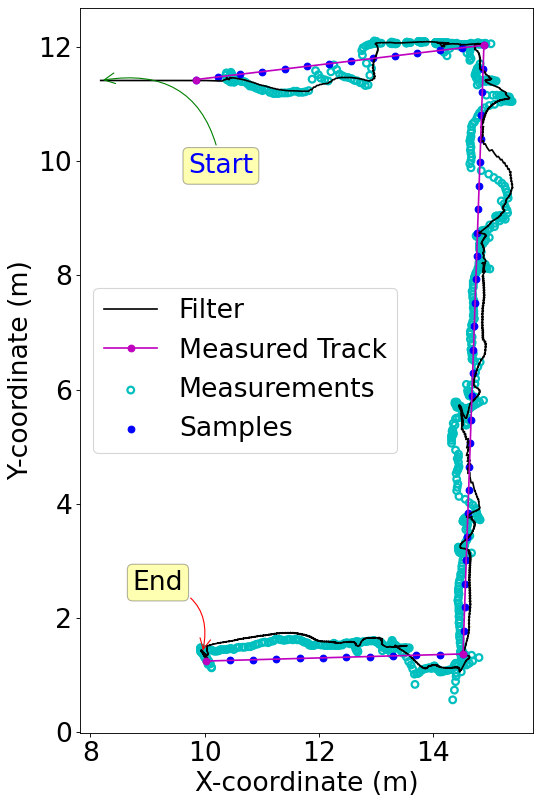

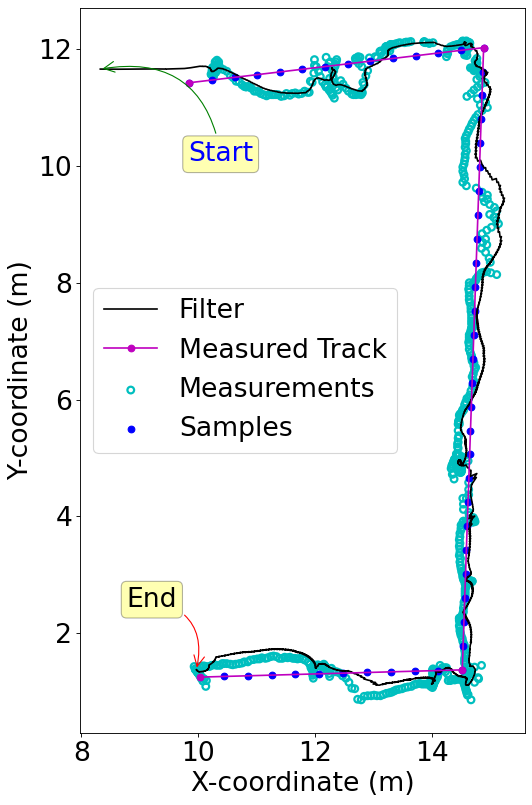

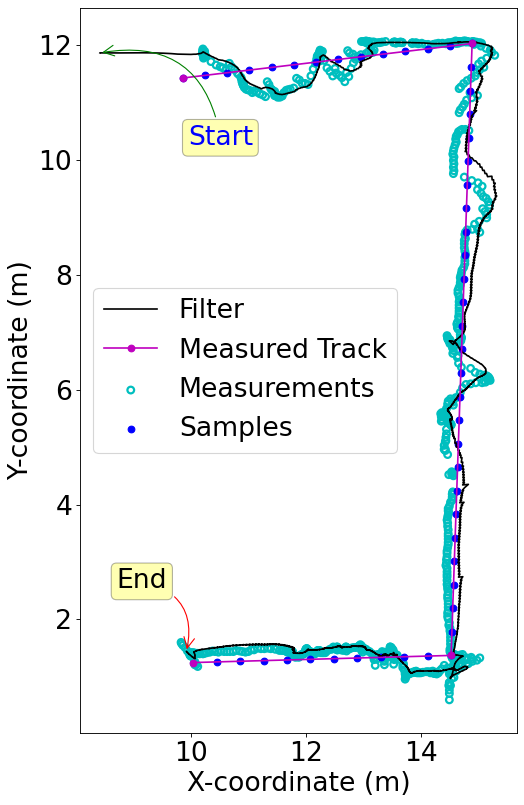

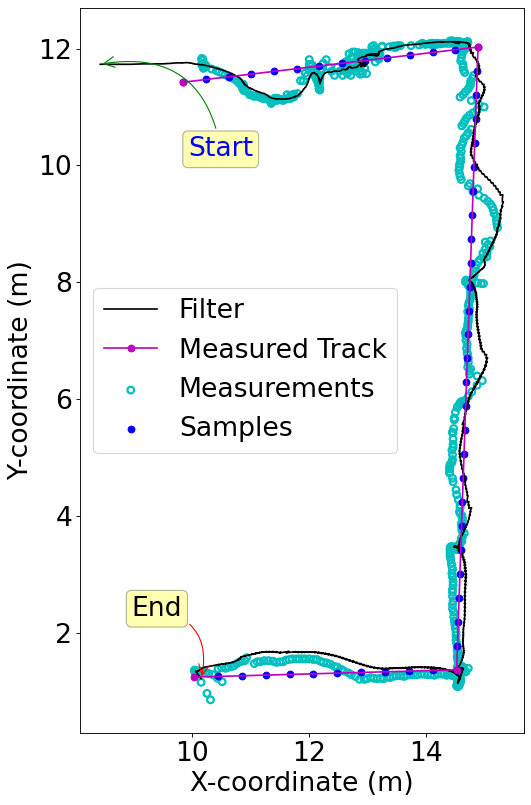

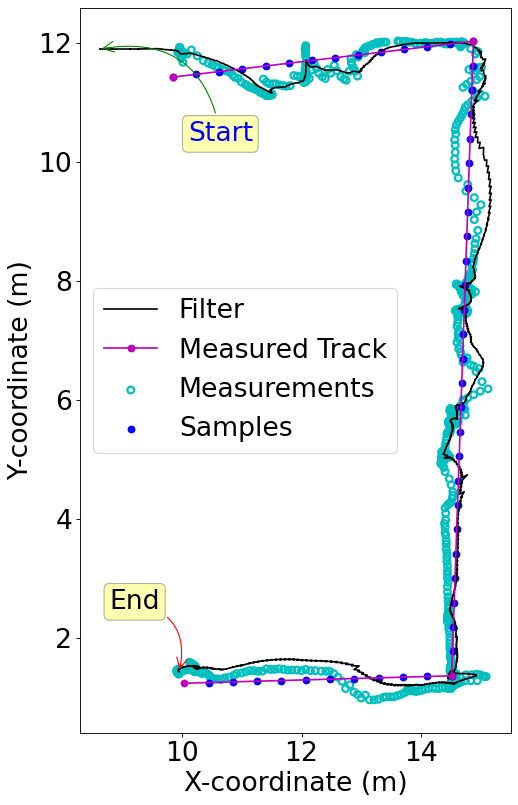

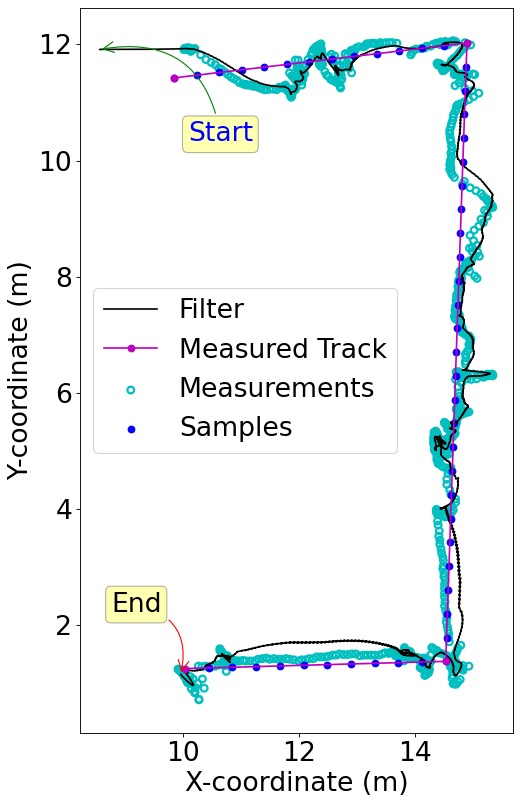

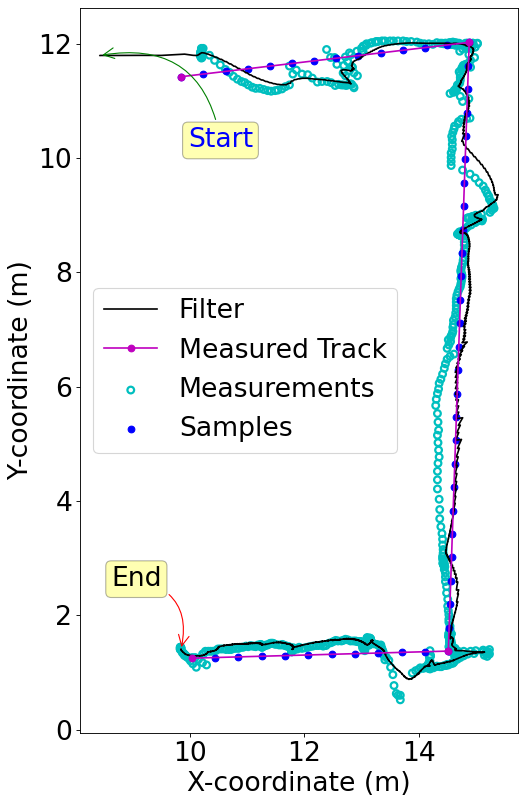

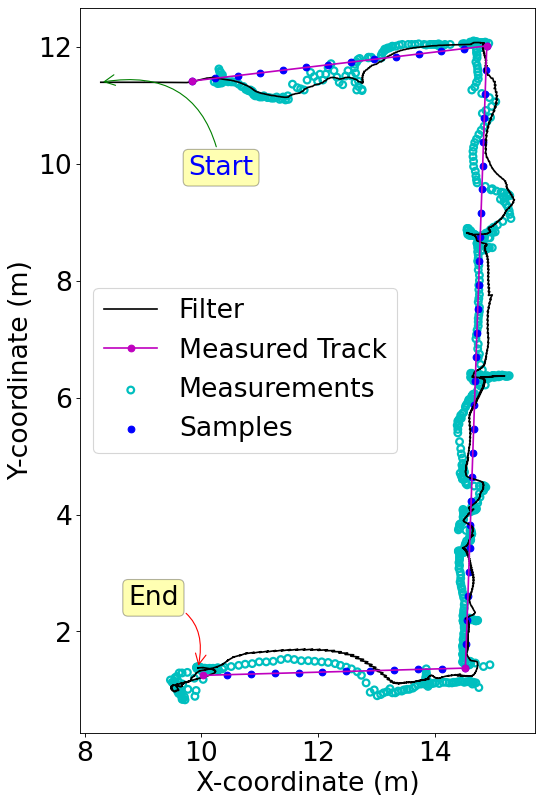

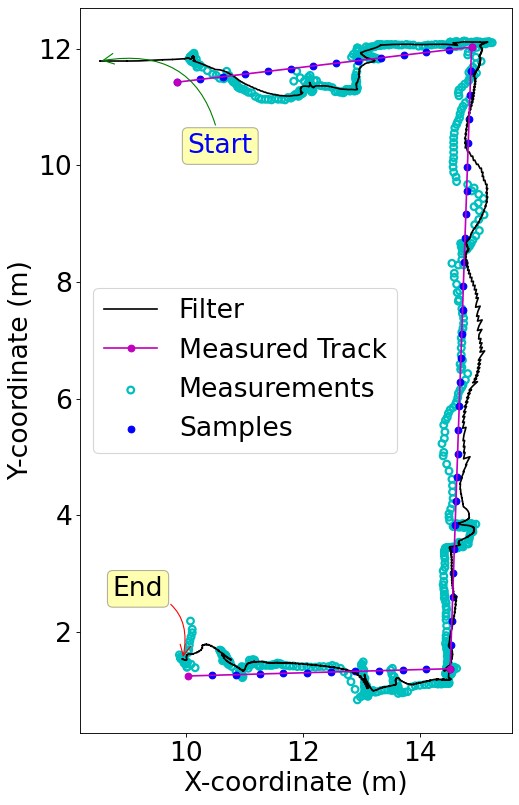

In [202]:
for i in range(1, 11):
    if i == 5:
        continue
    kf_hall(i)

In [84]:
df1

,time,la_x,la_y,uwb_x,uwb_y,vel_linear_x,vel_angular_z,mpu_ang_vel_z,mpu_linear_acc_x,mpu_linear_acc_y,...,cmd_linear_x,cmd_angular_z,var_x,var_y,var_xvel,var_yvel,vel_linear_y,odom_linear_y,odom_filtered_linear_y,cmd_linear_y
0,1.626092e+09,0.000017,-0.000001,0.00,0.00,3.236894e-07,-0.000003,NaN,NaN,NaN,...,NaN,NaN,3.891197,3.891087,0.009964,0.009964,0.0,0.000003,0.000004,NaN
1,1.626092e+09,0.000016,-0.000002,5.81,4.91,3.246793e-07,-0.000003,1.280488,0.002930,0.004883,...,NaN,NaN,3.891507,3.891398,0.008915,0.008915,0.0,0.000003,0.000004,NaN
2,1.626092e+09,0.000015,-0.000002,5.78,4.91,3.236894e-07,-0.000003,1.402439,0.002441,0.001953,...,NaN,NaN,3.892600,3.892490,0.010383,0.010383,0.0,0.000003,0.000003,NaN
3,1.626092e+09,0.000015,-0.000002,5.75,4.91,3.236894e-07,-0.000003,1.341463,0.009277,-0.002441,...,NaN,NaN,3.894078,3.893968,0.009984,0.009984,0.0,0.000002,0.000002,NaN
4,1.626092e+09,0.000014,-0.000002,5.78,4.92,3.246793e-07,-0.000003,1.280488,-0.001465,0.004395,...,NaN,NaN,3.894819,3.894709,0.009708,0.009708,0.0,0.000002,0.000001,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,1.626092e+09,-0.023683,-0.000180,1.78,2.41,9.818418e-07,-0.000009,1.341463,-0.001953,0.001953,...,0.0,0.0,4.171656,4.171492,0.010144,0.010145,0.0,0.000004,0.000001,0.0
174,1.626092e+09,-0.024976,-0.000184,1.77,2.42,9.818418e-07,-0.000009,1.280488,-0.007324,0.011719,...,0.0,0.0,4.172582,4.172419,0.009999,0.010000,0.0,0.000006,0.000005,0.0
175,1.626092e+09,-0.026071,-0.000185,1.85,2.39,9.848351e-07,-0.000009,1.402439,-0.009277,0.011719,...,0.0,0.0,4.173269,4.173105,0.010152,0.010152,0.0,0.000007,0.000007,0.0
176,1.626092e+09,-0.026959,-0.000182,1.87,2.37,9.848351e-07,-0.000009,1.280488,-0.010742,0.015625,...,0.0,0.0,4.173869,4.173706,0.008914,0.008914,0.0,0.000008,0.000009,0.0


In [85]:
def generate1(j):
    df1 = pd.read_csv(f'exp{j}_1407.csv')
    uwb_x1 = df1['uwb/x']
    uwb_y1 = df1['uwb/y']
    vel_linear_x1 = df1['odom/vx'].fillna(0.0)
    vel_linear_y1 = df1['odom/vy'].fillna(0.0)
    # index for first nonzero value of uwb_x
    ini_index1 = uwb_x1.ne(0).idxmax()
    var_x = process_var
    var_y = process_var_lateral
    var_xvel = df1['odom/var_vx'].fillna(0.0)
    var_yvel = df1['odom/var_vy'].fillna(0.0)

    tracker = KalmanFilter(dim_x=4, dim_z=2, dim_u=2)
    dt = 0.05
    tracker.F = np.array([[1, 0, 0,  0],
                          [0,  1, 0,  0],
                          [0,  0, 1, 0],
                          [0,  0, 0,  1]])   
    tracker.B = np.array([[dt, 0],
             [10**(-9), 0],
             [0, dt],
             [0, 10**(-9)]])
    # tracker.F = np.array([[1, 0, 0,  0],
    #                       [0,  0, 0,  0],
    #                       [0,  0, 1, 0],
    #                       [0,  0, 0, 0]])   
    # tracker.B = np.array([[dt, 0],
    #          [1, 0],
    #          [0, dt],
    #          [0, 1]])
    tracker.H = np.array([[1., 0., 0., 0], [0., 0., 1., 0.]])
    tracker.R = np.array([[sensor_var, 0], [0, sensor_var_lateral]])
    q_forward = Q_discrete_white_noise(dim=2, dt=dt, var=process_var)
    q_lateral = Q_discrete_white_noise(dim=2, dt=dt, var=process_var_lateral)    
    # tracker.Q = tracker.B @ np.array([[process_var*10, 0], [0, process_var_lateral*10]]) @ tracker.B.transpose()
    #     print(f"Q = {tracker.Q}")

    # robot movement
    N = len(uwb_x1[ini_index1:])
    zs1 = np.array([[uwb_x1[i], uwb_y1[i]] for i in range(ini_index1, N)])

    # run filter
    # robot_tracker = track()

    # state vector initialaization [x, vel_x, y, vel_y]
    ini_x = df1[df1['uwb/x'].notnull()]['uwb/x'][:5].mean()
    ini_y = df1[df1['uwb/y'].notnull()]['uwb/y'][:5].mean()
    tracker.x = np.array([[ini_x, vel_linear_x1[0], ini_y, vel_linear_y1[0]]]).T   
    #     P is the variance of the system
    ini_var = 10**(-9)
    tracker.P = np.array([[ini_var, 0, 0, 0],
                               [0, ini_var, 0, 0],
                               [0, 0, ini_var, 0],
                               [0, 0, 0, ini_var]])
    mu0 = []
    mu2 = []
    for i, z in enumerate(zs1):
    #     print(f"z = {z}")
    #     if not np.isnan(z[0]):
        cov_linear = np.array([[var_xvel[i], 0],
                              [0, var_yvel[i]]])
        tracker.Q = tracker.B @ cov_linear @ tracker.B.transpose()
        cmd_vel = np.array([[vel_linear_x1[i]],[vel_linear_y1[i]]])
    #     print(f"cmd_vel = {cmd_vel}")
        tracker.predict(u=cmd_vel)
        if not np.isnan(z[0]):
            tracker.update(z)
    #     print(f"tracker.x = {tracker.x}")
        mu0.append(tracker.x[0])
        mu2.append(tracker.x[2])

    # mu, cov, _, _ = robot_tracker.batch_filter(zs1[ini_index1:])
    while mu0[0] < 1 or mu2[0] < 1:
        mu0 = mu0[1:]
        mu2 = mu2[1:]
        
    # sample for evaluation
    for j, sx in enumerate(sampleX[:samp_lenY]):
        for k, m in enumerate(mu0):
            if abs(sx - m) <= 0.001:
                error.append(sqrt((sx - m)**2 + (sampleY[j] - mu2[k])**2))
                continue
                
    # plot result
    plt.figure(figsize=(16, 12), dpi=80)
    plt.rcParams.update({'font.size': 24})
    # c for color in plot_filter
    bp.plot_filter(mu0, mu2, c='black')
    bp.plot_measurements(zs1[ini_index1:, 0], zs1[ini_index1:, 1], color='c')
    #     plt.title('Kalman Filter position for robot movement under remote control')
    plt.xlabel("X-coordinate (m)")
    plt.ylabel("Y-coordinate (m)")
    # plt.title('Sensor Fusion Plot')
    # plt.annotate("Start", xy=(zs1[ini_index1][0], zs1[ini_index1][1]), xytext=(zs1[ini_index1][0] + 100, zs1[ini_index1][1] - 10), textcoords='offset points', ha='center', va='bottom',color='blue',
    #          bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.3),
    #          arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.05', 
    #                             color='green'))
    # plt.annotate("End", xy=(zs1[-1][0], zs1[-1][1]), xytext=(zs1[-1][0] - 100, zs1[-1][1]), textcoords='offset points', ha='center', va='bottom',
    #          bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.3),
    #          arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=-0.5', 
    #                             color='red'))
    plt.plot(xs, ys, '-o', color='m', label='Measured Track')
    plt.plot(theo_x, theo_y, '-o', color='r', label='Calculated Track')
    plt.annotate("Start", xy=(mu0[0], mu2[0]), xytext=(mu0[0] - 100, mu2[0] - 10), textcoords='offset points', ha='center', va='bottom',color='blue',
             bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.3),
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5', 
                                color='magenta'))
    plt.annotate("End", xy=(mu0[-1], mu2[-1]), xytext=(mu0[-1], mu2[-1] + 50), textcoords='offset points', ha='center', va='bottom',
             bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.3),
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=-0.5', 
                                color='red'))
    plt.legend(loc='best')
#     plt.show()
#     plt.savefig(f"expe{j}.pdf", bbox_inches='tight', dpi=400)

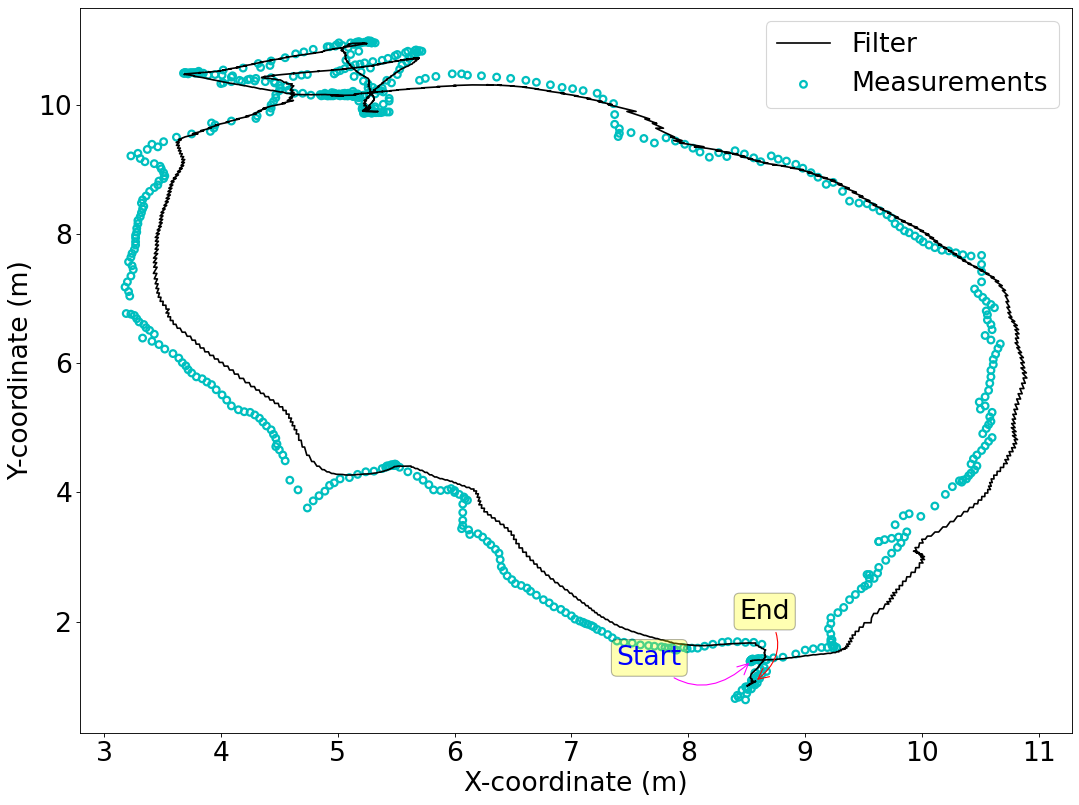

In [43]:
df1 = pd.read_csv(f'hall_random.csv')
uwb_x1 = df1['uwb/x']
uwb_y1 = df1['uwb/y']
vel_linear_x1 = df1['odom/vx'].fillna(0.0)
vel_linear_y1 = df1['odom/vy'].fillna(0.0)
# index for first nonzero value of uwb_x
ini_index1 = uwb_x1.ne(0).idxmax()
var_x = process_var
var_y = process_var_lateral
var_xvel = df1['odom/var_vx'].fillna(0.0)
var_yvel = df1['odom/var_vy'].fillna(0.0)

tracker = KalmanFilter(dim_x=4, dim_z=2, dim_u=2)
dt = 0.05
tracker.F = np.array([[1, 0, 0,  0],
                      [0,  1, 0,  0],
                      [0,  0, 1, 0],
                      [0,  0, 0,  1]])   
tracker.B = np.array([[dt, 0],
         [10**(-9), 0],
         [0, dt],
         [0, 10**(-9)]])
# tracker.F = np.array([[1, 0, 0,  0],
#                       [0,  0, 0,  0],
#                       [0,  0, 1, 0],
#                       [0,  0, 0, 0]])   
# tracker.B = np.array([[dt, 0],
#          [1, 0],
#          [0, dt],
#          [0, 1]])
tracker.H = np.array([[1., 0., 0., 0], [0., 0., 1., 0.]])
tracker.R = np.array([[sensor_var, 0], [0, sensor_var_lateral]])
q_forward = Q_discrete_white_noise(dim=2, dt=dt, var=process_var)
q_lateral = Q_discrete_white_noise(dim=2, dt=dt, var=process_var_lateral)    
# tracker.Q = tracker.B @ np.array([[process_var*10, 0], [0, process_var_lateral*10]]) @ tracker.B.transpose()
#     print(f"Q = {tracker.Q}")

# robot movement
N = len(uwb_x1[ini_index1:])
zs1 = np.array([[uwb_x1[i], uwb_y1[i]] for i in range(ini_index1, N)])

# run filter
# robot_tracker = track()

# state vector initialaization [x, vel_x, y, vel_y]
ini_x = df1[df1['uwb/x'].notnull()]['uwb/x'][:5].mean()
ini_y = df1[df1['uwb/y'].notnull()]['uwb/y'][:5].mean()
tracker.x = np.array([[ini_x, vel_linear_x1[0], ini_y, vel_linear_y1[0]]]).T   
#     P is the variance of the system
ini_var = 10**(-9)
tracker.P = np.array([[ini_var, 0, 0, 0],
                           [0, ini_var, 0, 0],
                           [0, 0, ini_var, 0],
                           [0, 0, 0, ini_var]])
mu0 = []
mu2 = []
for i, z in enumerate(zs1):
#     print(f"z = {z}")
#     if not np.isnan(z[0]):
    cov_linear = np.array([[var_xvel[i], 0],
                          [0, var_yvel[i]]])
    tracker.Q = tracker.B @ cov_linear @ tracker.B.transpose()
    cmd_vel = np.array([[vel_linear_x1[i]],[vel_linear_y1[i]]])
#     print(f"cmd_vel = {cmd_vel}")
    tracker.predict(u=cmd_vel)
    if not np.isnan(z[0]):
        tracker.update(z)
#     print(f"tracker.x = {tracker.x}")
    mu0.append(tracker.x[0])
    mu2.append(tracker.x[2])

# mu, cov, _, _ = robot_tracker.batch_filter(zs1[ini_index1:])
while mu0[0] < 1 or mu2[0] < 1:
    mu0 = mu0[1:]
    mu2 = mu2[1:]

# # sample for evaluation
# for j, sx in enumerate(sampleX[:samp_lenY]):
#     for k, m in enumerate(mu0):
#         if abs(sx - m) <= 0.001:
#             error.append(sqrt((sx - m)**2 + (sampleY[j] - mu2[k])**2))
#             continue

# plot result
plt.figure(figsize=(16, 12), dpi=80)
plt.rcParams.update({'font.size': 24})
# c for color in plot_filter
bp.plot_filter(mu0, mu2, c='black')
bp.plot_measurements(zs1[ini_index1:, 0], zs1[ini_index1:, 1], color='c')
#     plt.title('Kalman Filter position for robot movement under remote control')
plt.xlabel("X-coordinate (m)")
plt.ylabel("Y-coordinate (m)")
# plt.title('Sensor Fusion Plot')
# plt.annotate("Start", xy=(zs1[ini_index1][0], zs1[ini_index1][1]), xytext=(zs1[ini_index1][0] + 100, zs1[ini_index1][1] - 10), textcoords='offset points', ha='center', va='bottom',color='blue',
#          bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.3),
#          arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.05', 
#                             color='green'))
# plt.annotate("End", xy=(zs1[-1][0], zs1[-1][1]), xytext=(zs1[-1][0] - 100, zs1[-1][1]), textcoords='offset points', ha='center', va='bottom',
#          bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.3),
#          arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=-0.5', 
#                             color='red'))
# plt.plot(xs, ys, '-o', color='m', label='Measured Track')
# plt.plot(theo_x, theo_y, '-o', color='r', label='Calculated Track')
plt.annotate("Start", xy=(mu0[0], mu2[0]), xytext=(mu0[0] - 100, mu2[0] - 10), textcoords='offset points', ha='center', va='bottom',color='blue',
         bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.3),
         arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5', 
                            color='magenta'))
plt.annotate("End", xy=(mu0[-1], mu2[-1]), xytext=(mu0[-1], mu2[-1] + 50), textcoords='offset points', ha='center', va='bottom',
         bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.3),
         arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=-0.5', 
                            color='red'))
plt.legend(loc='best')
#     plt.show()
# plt.savefig(f"hall_oval.pdf", bbox_inches='tight', dpi=400)

In [87]:
from math import sqrt
error = []
for j, sx in enumerate(sampleX):
    for i, m in enumerate(mu[:, 0]):
        if abs(sx - m) <= 0.001:
            error.append(sqrt((sx - m)**2 + (sampleY[j] - mu[:, 2][i])**2))
            continue

NameError: name 'mu' is not defined

In [ ]:
err_len = len(error)
err_len

In [203]:
len(foyer_error)

450

In [ ]:
np.mean(error)

In [196]:
import statistics
# statistics.mean(error)

In [ ]:
statistics.variance(error)

In [ ]:
def generate(i):
    df1 = pd.read_csv(f'exp{i}_2506.csv')
    uwb_x1 = df1.uwb_x
    uwb_y1 = df1.uwb_y
    vel_linear_x1 = df1['vel_linear_x'].fillna(0.0)
    # first nonzero value for uwb_x
    ini_index1 = uwb_x1.ne(0).idxmax()
    def track():
        tracker = KalmanFilter(dim_x=4, dim_z=2)
        dt = 0.01
        tracker.F = np.array([[1, dt, 0,  0],
                              [0,  1, 0,  0],
                              [0,  0, 1, dt],
                              [0,  0, 0,  1]])
        tracker.u = 0.
        tracker.H = np.array([[1., 0., 0., 0], [0., 0., 1., 0.]])

        tracker.R = np.array([[sensor_var, 0], [0, sensor_var_lateral]])
        q_forward = Q_discrete_white_noise(dim=2, dt=dt, var=process_var)
        q_lateral = Q_discrete_white_noise(dim=2, dt=dt, var=process_var_lateral)
        tracker.Q = block_diag(q_forward, q_lateral)
    #     print(f"Q = {tracker.Q}")
        tracker.x = np.array([[uwb_x1[ini_index1], vel_linear_x1[0], uwb_y1[ini_index1], 0]]).T
        tracker.P = np.eye(4) * 0.5
        return tracker
    # robot circle movement
    N = len(uwb_x1[ini_index1:])
    zs1 = np.array([[uwb_x1[i], uwb_y1[i]] for i in range(ini_index1, N)])

    # run filter
    robot_tracker = track()
    # batch_filter is quite slow
    mu, cov, _, _ = robot_tracker.batch_filter(zs1[ini_index1:])

    # sample for evaluation
    for j, sx in enumerate(sampleX[:samp_lenY]):
        for k, m in enumerate(mu[:, 0]):
            if abs(sx - m) <= 0.001:
                error.append(sqrt((sx - m)**2 + (sampleY[j] - mu[:, 2][k])**2))
                continue
    
    # plot result
    plt.figure(figsize=(16, 12), dpi=80)
    plt.rcParams.update({'font.size': 24})
    # c for color in plot_filter
    bp.plot_filter(mu[:, 0], mu[:, 2], c='k')
    bp.plot_measurements(zs1[ini_index1:, 0], zs1[ini_index1:, 1], color='c')
#     plt.title('Kalman Filter position for robot movement under remote control')
    plt.xlabel("X-coordinate (m)")
    plt.ylabel("Y-coordinate (m)")
    # plt.annotate("Start", xy=(zs1[ini_index1][0], zs1[ini_index1][1]), xytext=(zs1[ini_index1][0] + 100, zs1[ini_index1][1] - 10), textcoords='offset points', ha='center', va='bottom',color='blue',
    #          bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.3),
    #          arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.05', 
    #                             color='green'))
    # plt.annotate("End", xy=(zs1[-1][0], zs1[-1][1]), xytext=(zs1[-1][0] - 100, zs1[-1][1]), textcoords='offset points', ha='center', va='bottom',
    #          bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.3),
    #          arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=-0.5', 
    #                             color='red'))
    plt.plot(xs, ys, '-o', color='m', label='Measured Track')
    plt.plot(theo_x, theo_y, '-o', color='r', label='Calculated Track')
    plt.annotate("Start", xy=(mu[0][0], mu[0][2]), xytext=(mu[0][0] - 100, mu[0][2] - 10), textcoords='offset points', ha='center', va='bottom',color='blue',
             bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.3),
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5', 
                                color='green'))
    plt.annotate("End", xy=(mu[-1][0], mu[-1][2]), xytext=(mu[-1][0], mu[-1][2] + 50), textcoords='offset points', ha='center', va='bottom',
             bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.3),
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=-0.5', 
                                color='red'))
    plt.legend(loc='best')
#     plt.savefig(f"exp{i}.pdf", bbox_inches='tight', dpi=400)

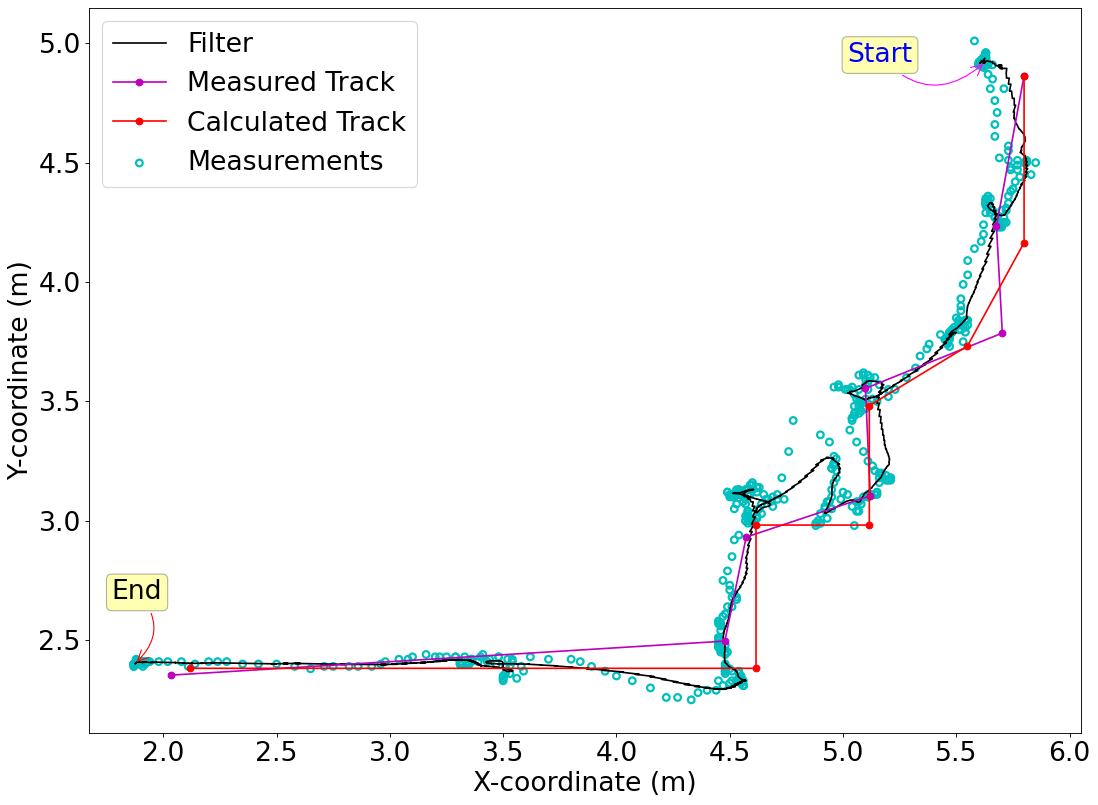

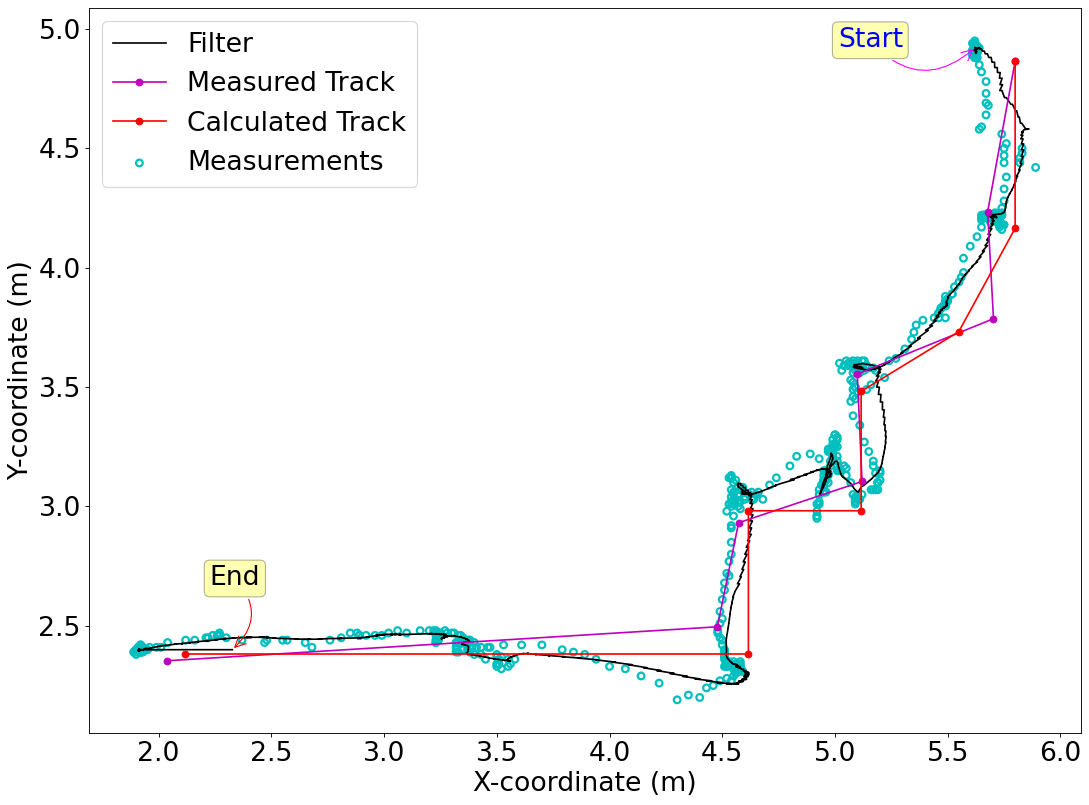

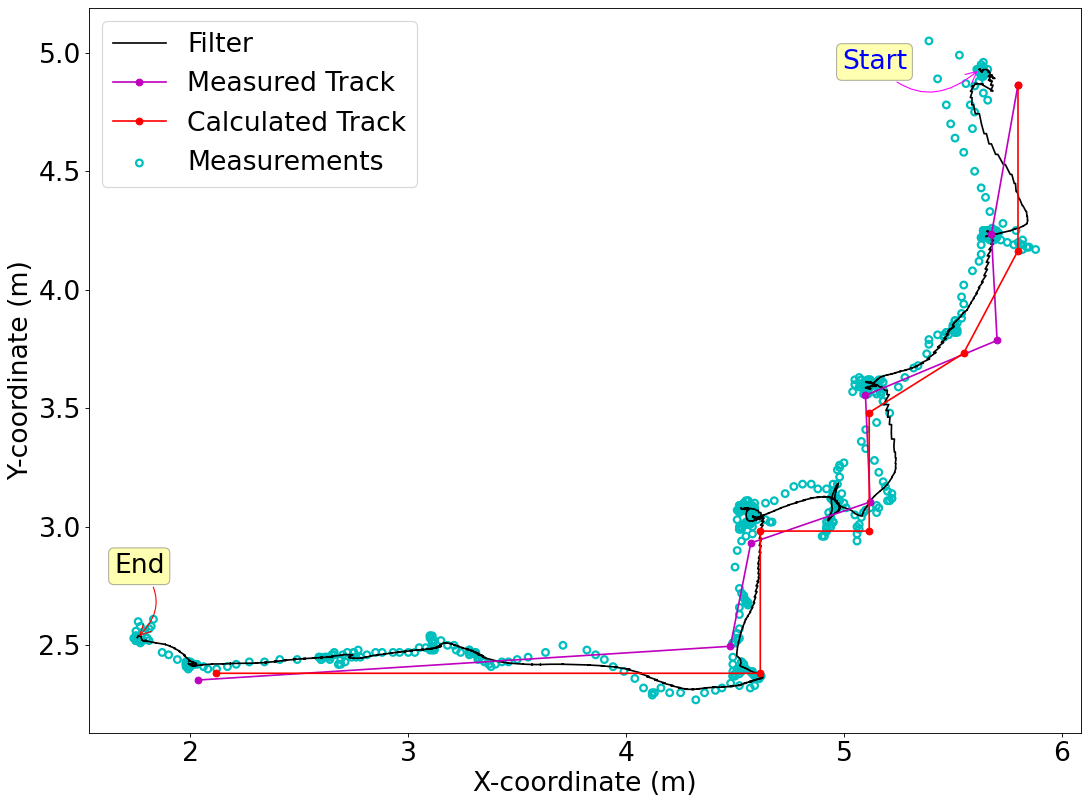

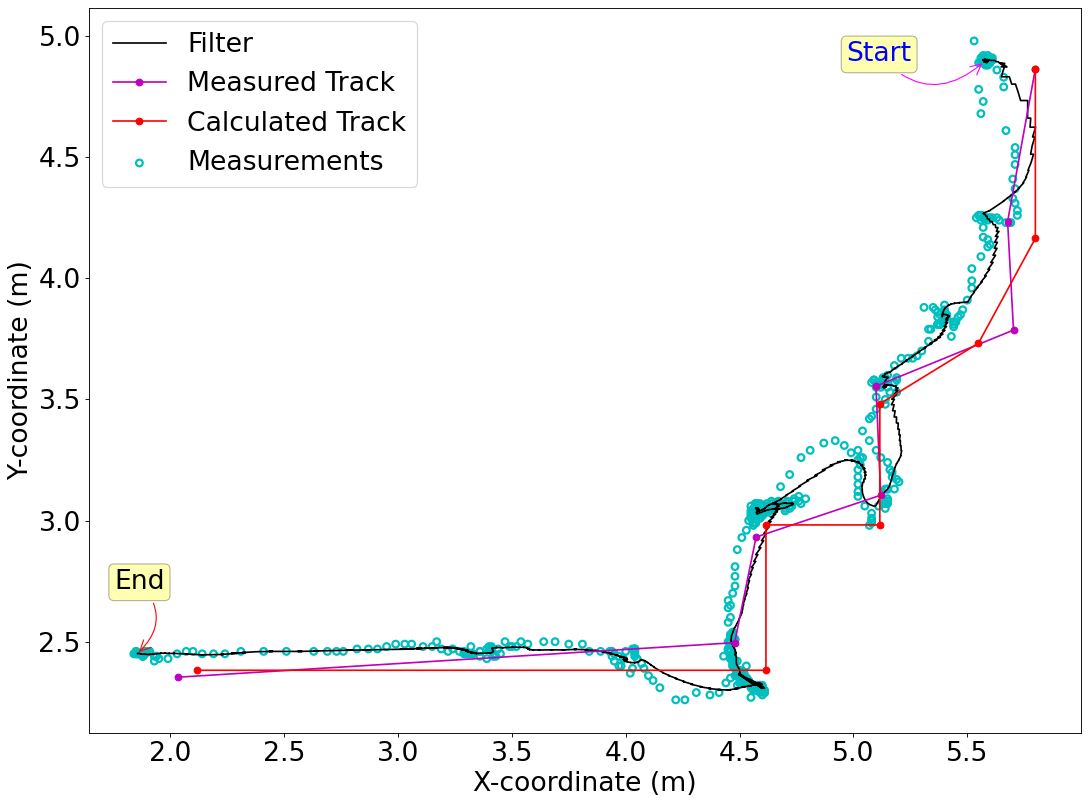

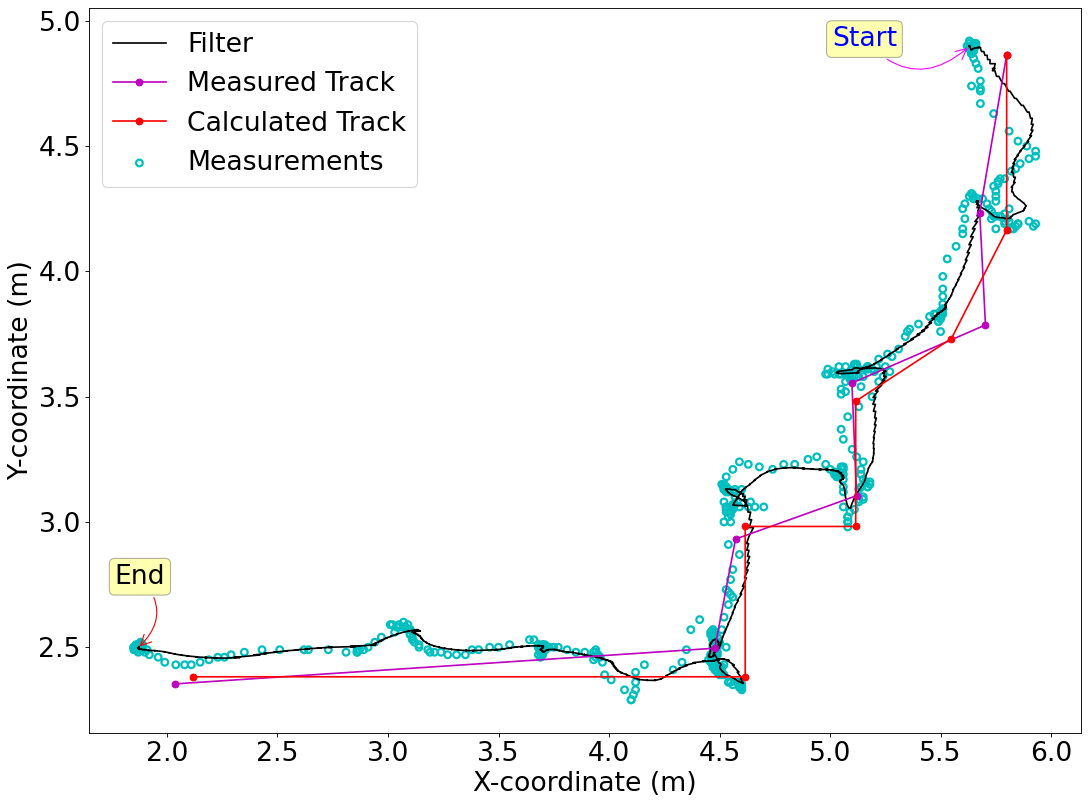

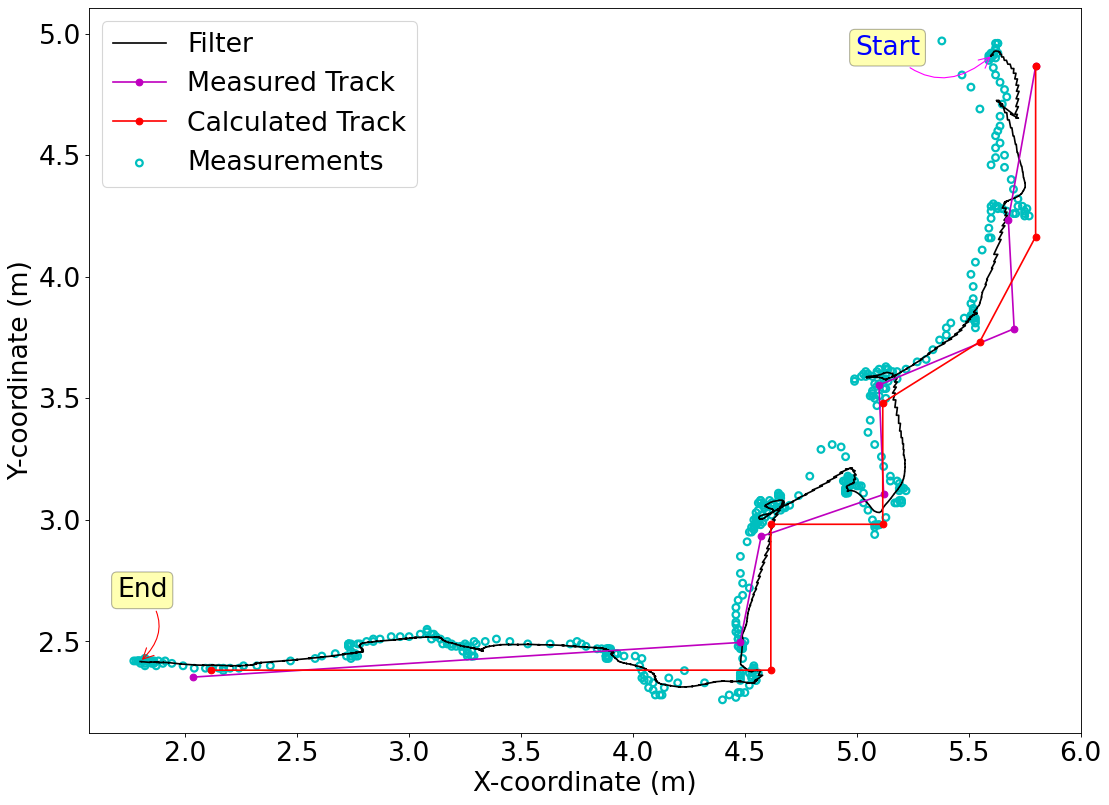

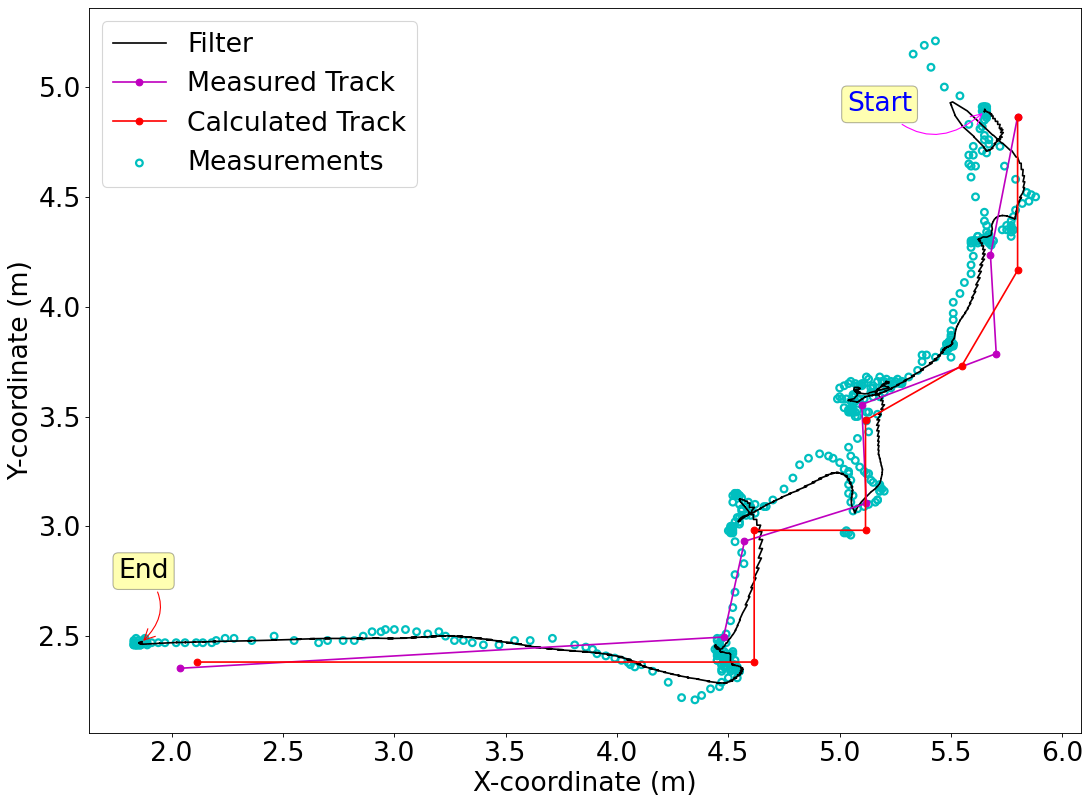

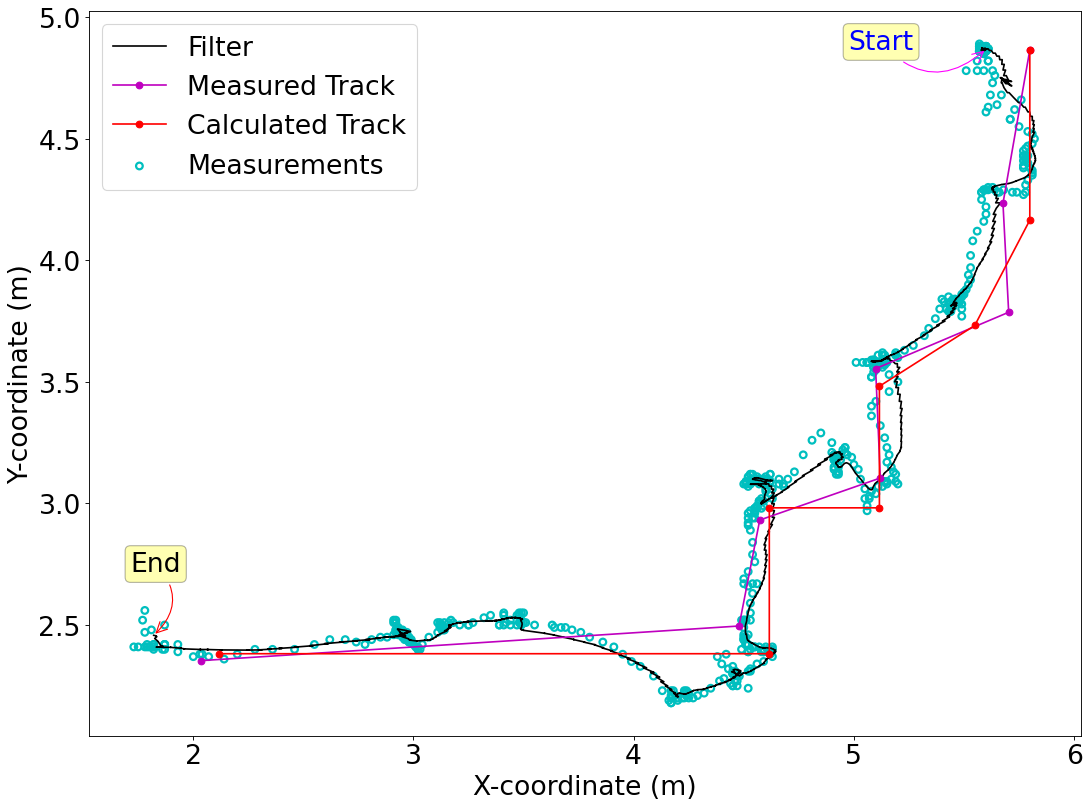

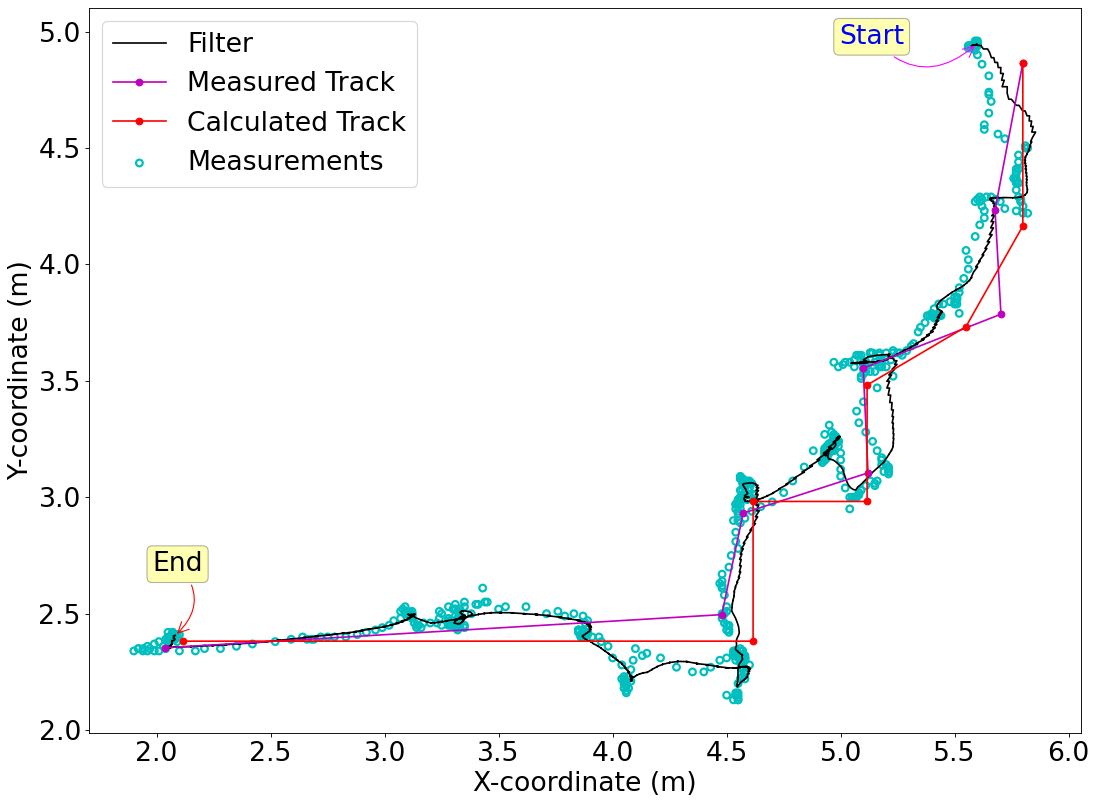

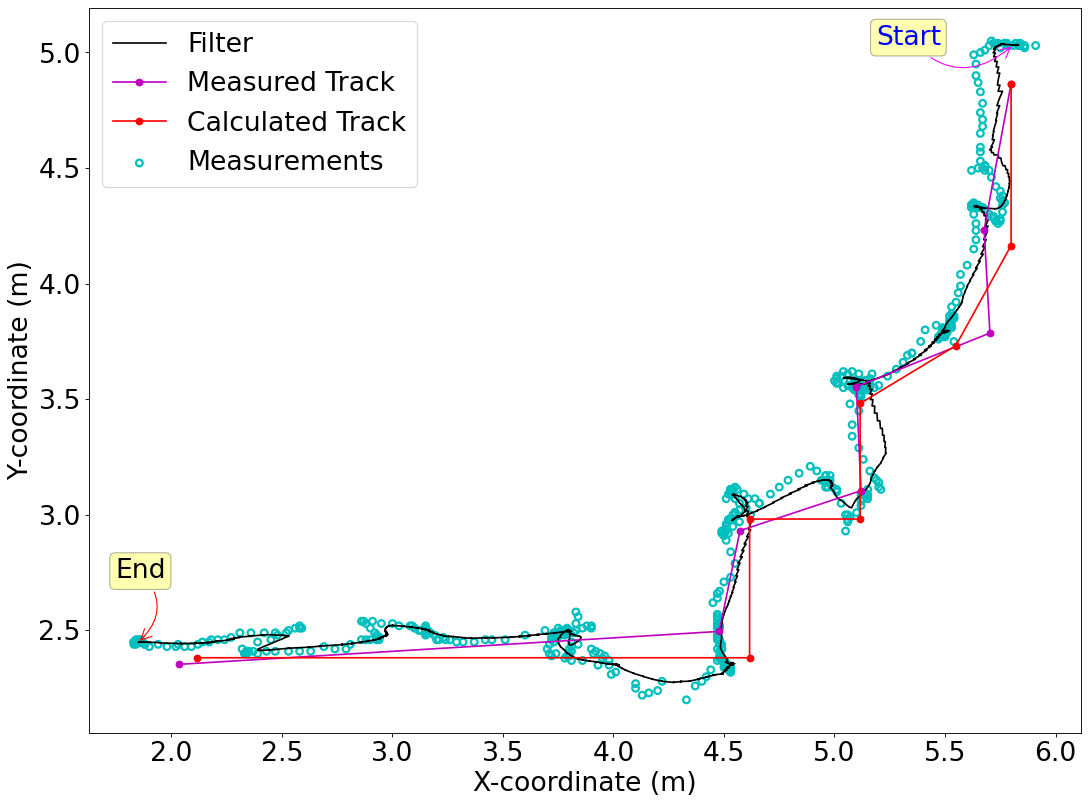

In [88]:
# generate plot for all experiments
for i in range(1, 11):    
    generate1(i)

In [198]:
print(f"mean = {np.mcean(error)} m, variance = {statistics.variance(error)} m\u00b2")

AttributeError: module 'numpy' has no attribute 'mcean'

In [199]:
foyer_error

[9.90751680033158,
 10.136956475158732,
 0.131101705899155,
 0.13110098538000936,
 6.513400587756104,
 6.535454175487617,
 6.635892959484449,
 10.577517313768576,
 10.577261078971317,
 10.582593815840522,
 10.582373179842254,
 3.218994895750539,
 3.218766497093597,
 3.384263465894005,
 3.669224749551316,
 4.078781427273219,
 1.1606760484445755,
 3.2364400393179547,
 3.503415078884014,
 4.338482732572839,
 4.385138491385945,
 4.488516654079618,
 4.535120478812391,
 5.051233184353896,
 0.5301125631939191,
 0.6126948798500714,
 2.6130273050491817,
 2.67653177849294,
 2.9971407549822953,
 3.23061289591623,
 2.065069120162151,
 2.2296752383509664,
 2.236071832901383,
 2.2417084549334474,
 1.6620480230526673,
 1.6620709345062092,
 2.0722854087348264,
 1.8550615843994978,
 6.047533403086516,
 2.483331868367871,
 0.8281458318319118,
 3.1170493996027364,
 3.645170536359691,
 5.66280947451255,
 2.891452029671101,
 2.8914740960880745,
 4.455409547485453,
 4.455162680152782,
 4.118262145646602,
 4

In [204]:
print(f"mean = {np.mean(foyer_error)} m, variance = {statistics.variance(foyer_error)} m\u00b2")

mean = 3.2215134321303758 m, variance = 7.926237762905229 m²
